In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Ashwin\\Learning\\Materials\\DataScience\\DataScience\\Material\\SLR\\Day 1\\Emp_reimb.csv')

In [3]:
df.head()

,Year,Type_of_yr,Emp_ID,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,42865,92288.22,267.45,270.45,92826.12,12500.56,20703.20,7605.75,40809.51,133635.63
1,2015,Calendar,28253,1466.38,0.00,350.23,1816.61,442.03,3.00,141.59,586.62,2403.23
2,2018,Financial,30664,76536.95,10855.94,13586.72,100979.61,12464.61,18636.19,8011.41,39112.21,140091.82
3,2018,Financial,19482,45659.88,1625.37,3.00,47288.25,0.00,10084.20,3936.63,14020.83,61309.08
4,2017,Financial,7183,41832.00,0.00,6.00,41838.00,5908.52,7621.60,3254.50,16784.62,58622.62


<AxesSubplot:>

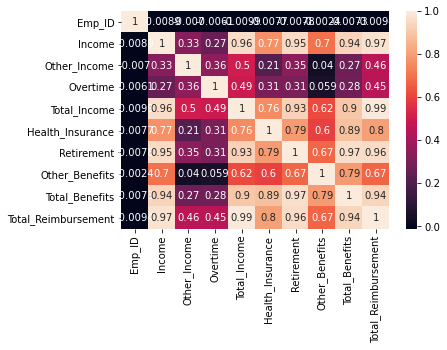

In [18]:
#Checking for multiple relationship
sns.heatmap(df.corr(),annot=True)

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

In [34]:
x_train,x_test,y_train,y_test=train_test_split(inp_col,target_col,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26320, 9), (11281, 9), (26320,), (11281,))

In [35]:
#
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lin_model=LinearRegression().fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
mse_test=mean_squared_error(y_pred,y_test)
print('Root Mean Squared Error:',round(np.sqrt(mse_test), 4))
r2_value_rfe = lin_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = lin_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.0
r-squared :  1.0
r-squared :  1.0


In [38]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.5).fit(x_train,y_train)
y_pred=enet.predict(x_test)
mse_test=mean_squared_error(y_pred,y_test)
print('Root Mean Squared Error:',round(np.sqrt(mse_test), 4))
r2_value_rfe = enet.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = enet.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 1884.3529
r-squared :  0.998858828742838
r-squared :  0.9988949810327193


In [40]:
#Model Evaluation using Cross validation score
scores = cross_val_score(   estimator = ElasticNet(alpha=0.1,l1_ratio=0.5), 
                            X = x_train, 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('All Train scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))


scores = cross_val_score(   estimator = ElasticNet(alpha=0.1,l1_ratio=0.5), 
                            X = x_test, 
                            y = y_test, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('\nAll Test scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All Train scores:  [0.99876452 0.99897032 0.99869003 0.99887726 0.99897289]

Minimum score obtained:  0.9987
Maximum score obtained:  0.999
Average score obtained:  0.9989

All Test scores:  [0.99873331 0.99878813 0.99889406 0.99888393 0.99886487]

Minimum score obtained:  0.9987
Maximum score obtained:  0.9989
Average score obtained:  0.9988


In [42]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = inp_col.columns
vif["VIF"] = [variance_inflation_factor(inp_col.values, i) for i in range(inp_col.shape[1])]
print(vif)

           Features           VIF
0            Emp_ID  1.000125e+00
1            Income  1.756682e+09
2      Other_Income  9.123626e+07
3          Overtime  1.439535e+07
4      Total_Income  5.868737e+07
5  Health_Insurance  4.240806e+06
6        Retirement  8.549604e+06
7    Other_Benefits  7.489774e+06
8    Total_Benefits  1.822166e+07


In [26]:
#Base model
import statsmodels.api as sm
y=target_col
X=inp_col
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total_Reimbursement   R-squared (uncentered):                   0.999
Model:                             OLS   Adj. R-squared (uncentered):              0.999
Method:                  Least Squares   F-statistic:                          6.988e+06
Date:                 Fri, 10 Jun 2022   Prob (F-statistic):                        0.00
Time:                         11:47:41   Log-Likelihood:                     -3.4725e+05
No. Observations:                37601   AIC:                                  6.945e+05
Df Residuals:                    37593   BIC:                                  6.946e+05
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [24]:
target_col=df['Total_Reimbursement']
inp_col=df.drop(['Year','Type_of_yr','Total_Reimbursement'],axis=1)

In [20]:
#4.Scaling data
df.iloc[:, 2:11] = df.iloc[:, 2:11].apply(lambda rec: (rec - rec.mean()) / rec.std())
df.head()

C:\Ashwin\Learning\Datascience\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,Year,Type_of_yr,Emp_ID,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,1.021278,0.979272,-0.476483,-0.234449,0.921924,0.911621,1.173963,1.141794,1.156388,133635.63
1,2015,Calendar,0.082710,-1.259481,-0.588280,-0.175594,-1.270526,-1.504303,-1.186975,-1.269380,-1.374560,2403.23
3,2018,Financial,-0.480675,-0.170114,0.091140,-0.431752,-0.175099,-1.592864,-0.037175,-0.043455,-0.529238,61309.08
4,2017,Financial,-1.270673,-0.264471,-0.588280,-0.429539,-0.306397,-0.409093,-0.318044,-0.263806,-0.355332,58622.62
5,2017,Calendar,1.507584,0.531722,0.015083,-0.431014,0.506445,0.989313,0.506980,0.698624,0.726492,109556.84


In [ ]:
#3.checking for null variable
df.isna().sum()
df.isnull().sum()
#4.Checking for duplicate values
df.duplicated().sum()
#5.Handling null values

In [19]:
#Checking for outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-19-c616e44e6aa0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-19-c616e44e6aa0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(37601, 12)

In [12]:
#2. Univariate, Multivariate Analysis
#Checking skewness and kurtosis
df.skew()
df.kurtosis()

Year                   -1.490196
Emp_ID                 -1.200390
Income                  0.364251
Other_Income           81.428060
Overtime               27.278675
Total_Income            0.295859
Health_Insurance       -1.100428
Retirement              0.098035
Other_Benefits          4.821056
Total_Benefits         -0.689455
Total_Reimbursement    -0.155537
dtype: float64

In [9]:
#1.converting column to respective data types
df['Year']=df['Year'].astype(object)

In [4]:
df.shape

(49794, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49794 entries, 0 to 49793
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 49794 non-null  object 
 1   Type_of_yr           49794 non-null  object 
 2   Emp_ID               49794 non-null  int64  
 3   Income               49794 non-null  float64
 4   Other_Income         49794 non-null  float64
 5   Overtime             49794 non-null  float64
 6   Total_Income         49794 non-null  float64
 7   Health_Insurance     49794 non-null  float64
 8   Retirement           49794 non-null  float64
 9   Other_Benefits       49794 non-null  float64
 10  Total_Benefits       49794 non-null  float64
 11  Total_Reimbursement  49794 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.6+ MB
